<a href="https://colab.research.google.com/github/gmanojkumar402-max/Manoj-colab-notebooks/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd

In [32]:
df = pd.read_csv("/content/sample_data/mnist_train_small.csv")

In [33]:
df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df.shape

(19999, 785)

In [35]:
df.sample()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
19157,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


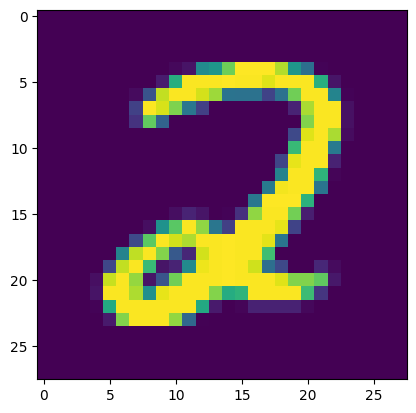

In [36]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[7700,1:].values.reshape(28,28))

In [37]:
x = df.iloc[:,1:]
x.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
y = df.iloc[:,0]
y.head()

,6
0,5
1,7
2,9
3,5
4,2


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [40]:
X_train.shape

(15999, 784)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [42]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(y_pred)
print(time.time() - start)

[1 7 0 ... 6 3 8]
7.420653581619263


In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.95525

Now let's use PCA reduce the dimension so as to save time or increase the execution speed

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
#PCA
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components = 200)

In [49]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [50]:
X_train_trf.shape

(15999, 200)

In [51]:
knn = KNeighborsClassifier()

In [52]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [53]:
import time
start = time.time()
y_pred = knn.predict(X_test_trf)
print(y_pred)
print(time.time() - start)

[7 7 0 ... 6 3 8]
2.3593270778656006


In [54]:
accuracy_score(y_test,y_pred)

0.9325

In [55]:
best_accuracy = 0        # Initialize with 0 or a very low number
best_n_components = 0    # Initialize with 0
for i in range(1,785):
  pca = PCA(n_components =i)
  X_train_trf = pca.fit_transform(X_train)
  X_test_trf = pca.transform(X_test)
  knn = KNeighborsClassifier()
  knn.fit(X_train_trf,y_train)
  y_pred = knn.predict(X_test_trf)
  acc = accuracy_score(y_test, y_pred)

    # Check if this accuracy is the best so far
  if acc > best_accuracy:
      best_accuracy = acc
      best_n_components = i

  print(f"n_components={i}, accuracy={acc:.4f}")

print("\n Best number of components:", best_n_components)
print(" Best accuracy:", best_accuracy)

n_components=1, accuracy=0.2502
n_components=2, accuracy=0.3167
n_components=3, accuracy=0.5090
n_components=4, accuracy=0.6607
n_components=5, accuracy=0.7298
n_components=6, accuracy=0.8205
n_components=7, accuracy=0.8257
n_components=8, accuracy=0.8550
n_components=9, accuracy=0.8692
n_components=10, accuracy=0.8895
n_components=11, accuracy=0.8978
n_components=12, accuracy=0.9018
n_components=13, accuracy=0.9107
n_components=14, accuracy=0.9150
n_components=15, accuracy=0.9190
n_components=16, accuracy=0.9213
n_components=17, accuracy=0.9223
n_components=18, accuracy=0.9243
n_components=19, accuracy=0.9247
n_components=20, accuracy=0.9287
n_components=21, accuracy=0.9293
n_components=22, accuracy=0.9275
n_components=23, accuracy=0.9307
n_components=24, accuracy=0.9305
n_components=25, accuracy=0.9325
n_components=26, accuracy=0.9353
n_components=27, accuracy=0.9343
n_components=28, accuracy=0.9320
n_components=29, accuracy=0.9345
n_components=30, accuracy=0.9363
n_components=31, ac

In [56]:
# transforming to a 2D coordinate system
pca = PCA(n_components = 3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [57]:
X_train_trf

array([[ -2.64388752,   1.82180386,   3.92197665],
       [ -3.97314247,  -4.56300005,   1.64148137],
       [ -7.48361932,  -1.33266029,   3.17676199],
       ...,
       [  2.02183629,   6.47553651,   4.61065221],
       [  8.21824316,  19.22591938,   2.98975773],
       [  4.87314199,  10.40539569, -14.15792507]])

In [58]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x= X_train_trf[:,0], y = X_train_trf[:,1], z = X_train_trf[:,2], color =y_train_trf)
fig.update_layout(margin=dict(l=20, r=20, b=20, t=20))
fig.show()

In [59]:
pca.explained_variance_    # gives eigen values as we have choosen n_componments as 3 It given top 3 eigen values

array([41.15287737, 29.74356311, 26.77529536])

In [60]:
pca.components_ # gives 3 vectors in the 784D space

array([[-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [61]:
pca.components_.shape # it will be (3, 784) 3 vectors and each vector has 784 components

(3, 784)

In [63]:
pca.explained_variance_ratio_

array([0.05972468, 0.04316648, 0.03885867])

In [66]:
pca = PCA(n_components = None)
pca.fit_transform(X_train)
pca.transform(X_test)
pca.explained_variance_.shape

(784,)

In [68]:
pca.components_.shape

(784, 784)

In [73]:
import numpy as np
np.cumsum(pca.explained_variance_ratio_)


array([0.05972468, 0.10289116, 0.14174983, 0.17207244, 0.19811419,
       0.22103136, 0.24133663, 0.25939057, 0.2753868 , 0.28992425,
       0.30396441, 0.31675046, 0.32863549, 0.3401442 , 0.35088116,
       0.36124566, 0.37107214, 0.38069355, 0.39000561, 0.39907306,
       0.40776135, 0.41625644, 0.42426632, 0.4321929 , 0.43991664,
       0.44736439, 0.45471364, 0.4616764 , 0.46841738, 0.47496064,
       0.48134429, 0.48761487, 0.49384031, 0.49986217, 0.50583386,
       0.51171684, 0.51755359, 0.52319067, 0.52862059, 0.53400856,
       0.53934216, 0.54455906, 0.54963495, 0.55457507, 0.5594546 ,
       0.56425033, 0.5689664 , 0.57360869, 0.57820769, 0.58269461,
       0.58716453, 0.59153193, 0.59586424, 0.60011701, 0.6042857 ,
       0.60834706, 0.61234004, 0.61627214, 0.62015944, 0.62398311,
       0.62776889, 0.63146562, 0.63511597, 0.63872827, 0.64232559,
       0.64587513, 0.64936355, 0.65275925, 0.65612997, 0.65947237,
       0.6627727 , 0.66605477, 0.66929108, 0.67247646, 0.67563

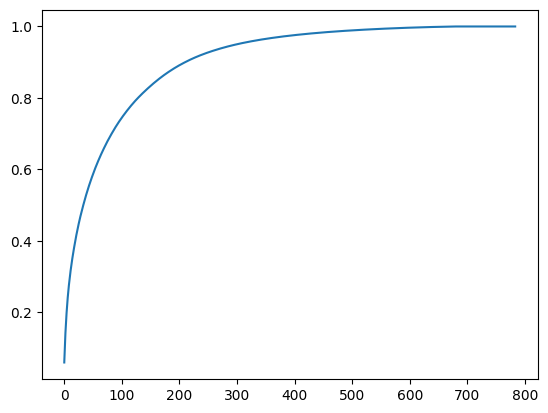

In [74]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))